In [1]:
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from scipy.stats import linregress
from scipy.optimize import curve_fit
import scipy.stats as stats
import numpy as np
import pandas as pd

# Load and Split Dataframes

In [2]:
df = pd.read_csv('clsj105.csv') # load dataframe, add name of csv file

# Analyte Names:
cu1 = 'Cu 327.393'
cu2 = 'Cu 324.752'
cu3 = 'Cu 224.700'

zn1 = 'Zn 213.857'
zn2 = 'Zn 206.200'
zn3 = 'Zn 202.548'

metal1 = 'Ni 231.604'
metal2 = 'Ni 221.648'
metal3 = 'Ni 232.003'

# spliting dataframes
df_cu1 = df[df['Analyte Name'] == cu1]
df_cu2 = df[df['Analyte Name'] == cu2]
df_cu3 = df[df['Analyte Name'] == cu3]

df_zn1 = df[df['Analyte Name'] == zn1]
df_zn2 = df[df['Analyte Name'] == zn2]
df_zn3 = df[df['Analyte Name'] == zn3]

df_metal1 = df[df['Analyte Name'] == metal1]
df_metal2 = df[df['Analyte Name'] == metal2]
df_metal3 = df[df['Analyte Name'] == metal3]


df_list = [df_cu1, df_cu2, df_cu3, df_zn1, df_zn2, df_zn3, df_metal1, df_metal2, df_metal3] # list of each analyte measurement

dfs_subset = [df_cu2, df_zn1, df_metal1] # particular wavelength used for each metal sample

c = [0.0, 0.01, 0.1, 1.0, 10.0, 25.0, 50.0] # concnetraions of standards in order (0.0 is for the blank)

# Plot Fucntions

## Individual Plots

In [3]:
def plot(df):
    """
    Plot individual calibration curve with linear regression for 
    a single wavelength measurment (single dataframe) 
    
    Parameters
    ----------
    df: pd.DataFrame object
        must contain a blank + 6 standard concentraions, 
        specify the rows if necessary
    """
    y = df['Int (Corr)'].to_list()[0:7] # modify row numbers to match the order of concentrations if necessary
    yerr = df['SD (Corr Int)'].to_numpy()[0:7]
    
    zero = y[0]
    y = [i - zero for i in y]
    # print(f'y values: {y}')

    x = np.array(c)
    y = np.array(y)

    def model(x, m):
        return m * x

    slope, _ = curve_fit(model, x, y)
    slope = slope[0]

    x_space = np.linspace(min(x), max(x), 100)
    y_fit = slope * x_space

    ss_res = np.sum((y - slope * x)**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    r2 = 1 - (ss_res / ss_tot)

    fig, ax = plt.subplots()
    ax.plot(c, y, marker='o', linestyle='')
    ax.plot(x_space, y_fit, 'k--', label=f'y={slope:.3f}x, R^2 = {r2:.5f}')
            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Concentration (ppm)')
    ax.set_title(f'Standard Curve: {df['Analyte Name'].iloc[0]}')
    ax.grid(True)
    ax.legend()
    plt.savefig(f'Visualizations/{df['Analyte Name'].iloc[0]}.png')

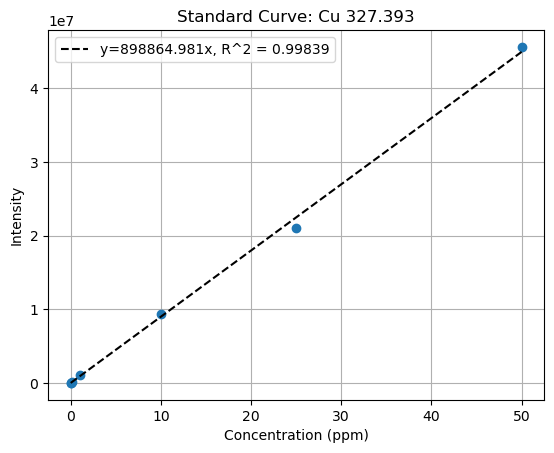

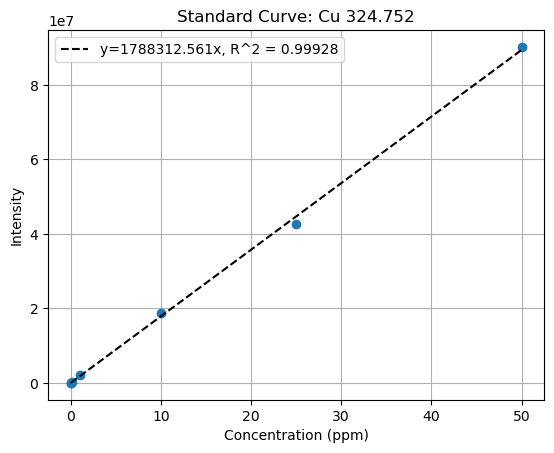

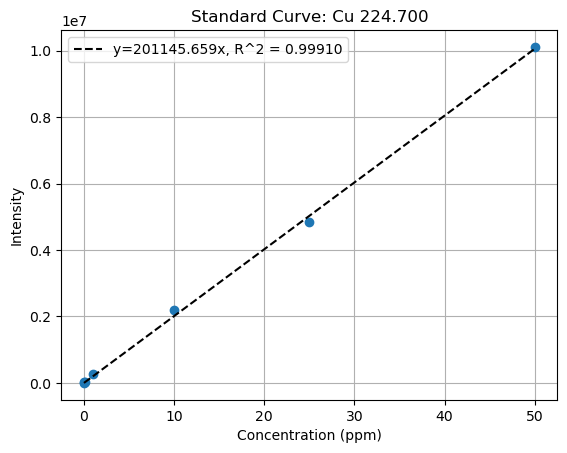

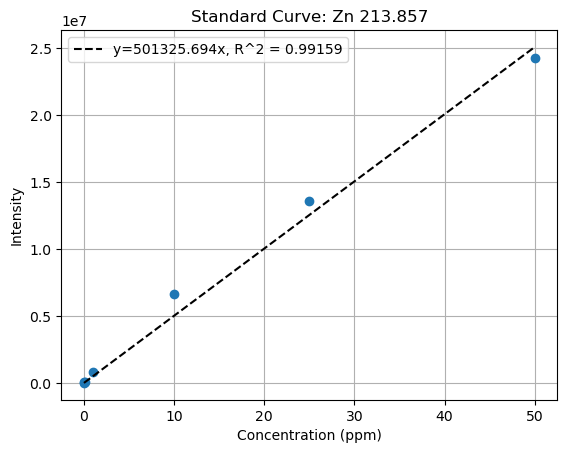

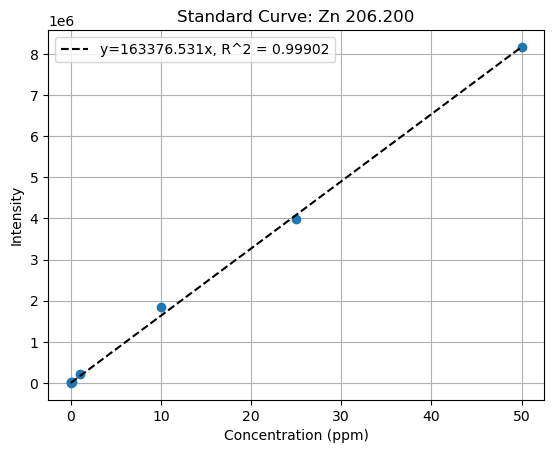

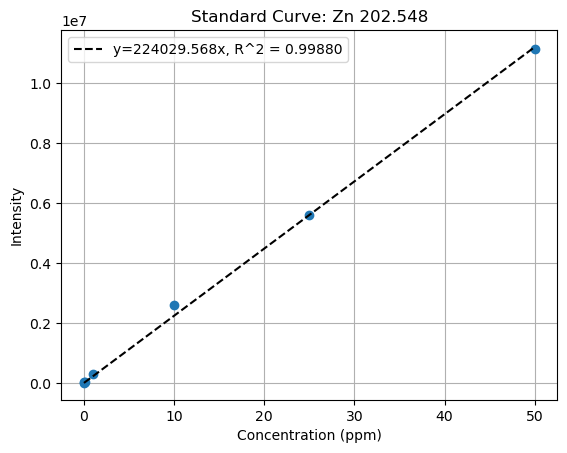

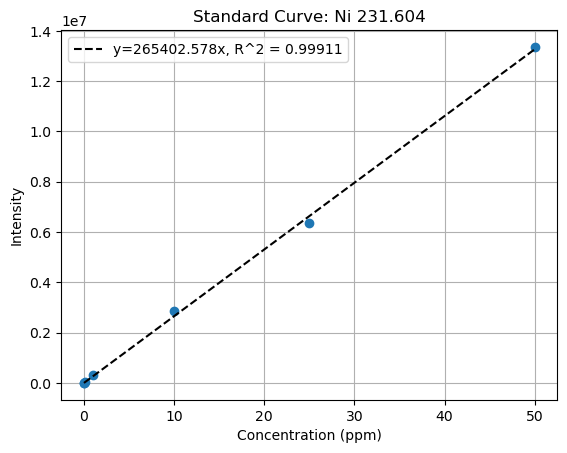

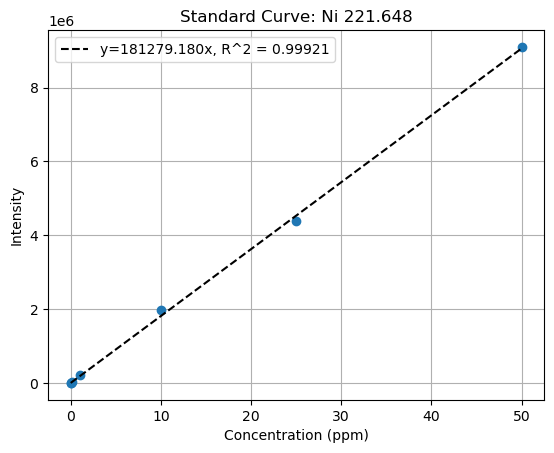

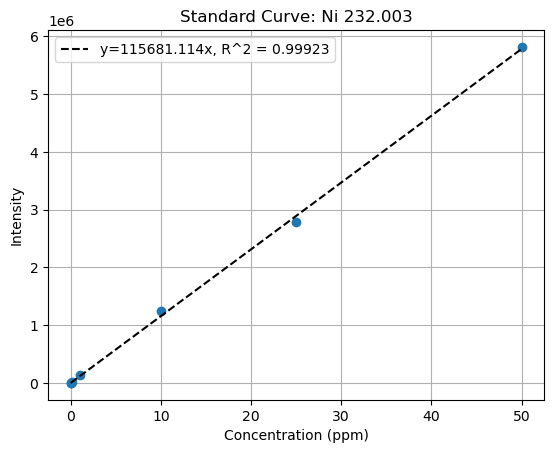

In [4]:
for df_iter in df_list: # plot single calibration curve for each wavelength in df_list
    plot(df_iter)

## Selected Plots

In [5]:
def plots(dfs, ax):
    """
    Plot calirbation curves with linear regression for 
    multiple wavelegnths on a single plot 
    
    Parameters
    ----------
    dfs: list of pd.DataFrame object
        each dataframe must contain a blank + 6 standard 
        concentraions, specify the rows if necessary
    """
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    legend_handles = []

    for i, df in enumerate(dfs):
        y = df['Int (Corr)'].to_list()[0:7]
        yerr = df['SD (Corr Int)'].to_numpy()[0:7]
        
        zero = y[0]
        y = [i - zero for i in y]
        # print(f'y values: {y}')

        x = np.array(c)
        y = np.array(y)

        def model(x, m):
            return m * x

        slope, _ = curve_fit(model, x, y)
        slope = slope[0]

        x_space = np.linspace(min(x), max(x), 100)
        y_fit = slope * x_space

        ss_res = np.sum((y - slope * x)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_res / ss_tot)

        ax.plot(c, y, marker='o', linestyle='')
        ax.plot(x_space, y_fit, 'k--')
        legend_handles.append(
            mlines.Line2D([], [], color=colors[i], marker='o', linestyle='',
                          label=f'{df["Analyte Name"].iloc[0]} nm: \n m={slope:.3f}, R^2 = {r2:.5f}')
        )            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Concentration (ppm)')
    ax.set_title(f'Standard Calibration Curves')
    ax.grid(True)
    ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.8), labelspacing=1.2)
    plt.savefig('Visualizations/calibration_main.png', bbox_inches='tight')

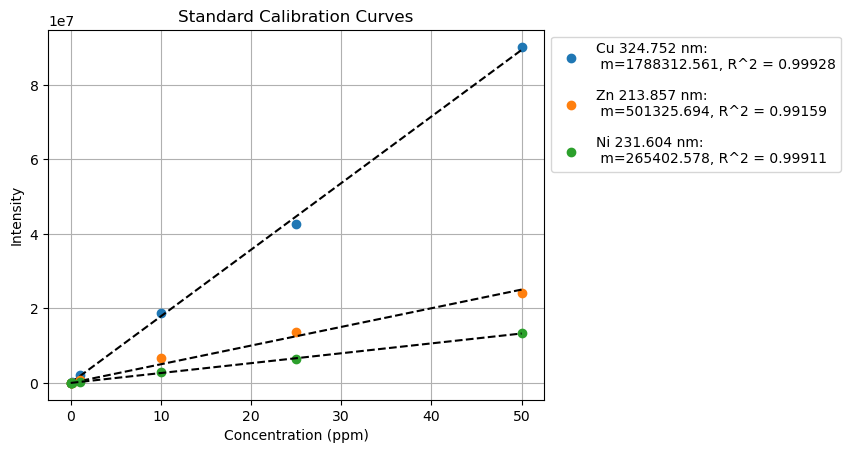

In [6]:
fig, ax = plt.subplots()
plots(dfs_subset, ax)

In [7]:
def plots_errorbar(dfs, ax):
    """
    Plot calirbation curves with linear regression for 
    multiple wavelegnths on a single plot with error bars
    
    Parameters
    ----------
    dfs: list of pd.DataFrame object
        each dataframe must contain a blank + 6 standard 
        concentraions, specify the rows if necessary
    """
    colors = ['tab:blue', 'tab:orange', 'tab:green']
    legend_handles = []

    for i, df in enumerate(dfs):
        y = df['Int (Corr)'].to_list()[0:7]
        yerr = df['SD (Corr Int)'].to_numpy()[0:7]
        
        zero = y[0]
        y = [i - zero for i in y]
        print(f'y values: {y}')

        x = np.array(c)
        y = np.array(y)

        def model(x, m):
            return m * x

        slope, _ = curve_fit(model, x, y)
        slope = slope[0]

        x_space = np.linspace(min(x), max(x), 100)
        y_fit = slope * x_space

        ss_res = np.sum((y - slope * x)**2)
        ss_tot = np.sum((y - np.mean(y))**2)
        r2 = 1 - (ss_res / ss_tot)

        ax.plot(c, y, marker='o', linestyle='', color=colors[i])
        ax.plot(x_space, y_fit, 'k--')
        ax.errorbar(x, y, yerr=yerr, fmt='none', label='error', capsize=4, color='tab:red')
        legend_handles.append(
            mlines.Line2D([], [], color=colors[i], marker='o', linestyle='',
                          label=f'{df["Analyte Name"].iloc[0]} nm')
        )            
    ax.ticklabel_format(style='sci', axis='y', scilimits=(0,0))
    ax.set_ylabel('Intensity')
    ax.set_xlabel('Concentration (ppm)')
    ax.set_title(f'Standard Calibration Curves')
    ax.grid(True)
    ax.legend(handles=legend_handles, loc='center left', bbox_to_anchor=(1, 0.8), labelspacing=1.2)
    plt.savefig('Visualizations/calibration_error.png', bbox_inches='tight')

y values: [0.0, 51987.98476, 180224.64876, 2041051.0554599997, 18649643.318460003, 42779497.598460004, 90221418.37845999]
y values: [0.0, 35605.829723, 89368.385853, 791042.7686630001, 6614746.730862999, 13553119.976862999, 24230118.996863]
y values: [0.0, 4967.311664999999, 35088.850559000006, 324231.607679, 2878447.828079, 6364049.596079, 13359557.807079]


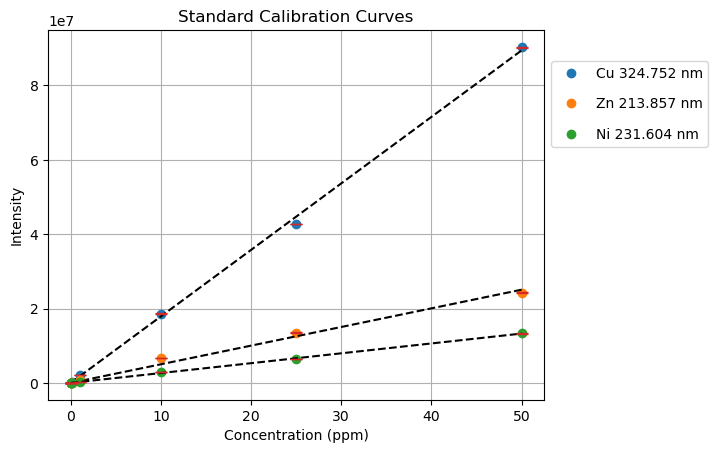

In [8]:
fig, ax = plt.subplots()
plots_errorbar(dfs_subset, ax)

## Combined Plots

In [9]:
def plot_standrad_ax(axes, dfs_broken):
    """
    Plot individual calibration curves with linear regression 
    in a single plot
    
    Parameters
    ----------
    dfs_broken: list of pd.DataFrame object
        each dataframe must contain a blank + 6 standard 
        concentraions, specify the rows if necessary, make 
        sure indicies properly aligned
    """
    colors = ['tab:blue', 'tab:orange', 'tab:green']

    for i, dfs_iter in enumerate(dfs_broken):
        for j, df_iter in enumerate(dfs_iter):
            y = df_iter['Int (Corr)'].to_list()[0:7]
            yerr = df_iter['SD (Corr Int)'].to_numpy()[0:7]
            
            zero = y[0]
            y = [i - zero for i in y]
            print(f'y values: {y}')

            x = np.array(c)
            y = np.array(y)

            def model(x, m):
                return m * x

            slope, _ = curve_fit(model, x, y)
            slope = slope[0]

            x_space = np.linspace(min(x), max(x), 100)
            y_fit = slope * x_space

            ss_res = np.sum((y - slope * x)**2)
            ss_tot = np.sum((y - np.mean(y))**2)
            r2 = 1 - (ss_res / ss_tot)

            axes[i, j].plot(c, y, marker='o', linestyle='', color=colors[i])
            axes[i, j].plot(x_space, y_fit, 'k--', label=f'm={slope:.3f}, R^2 = {r2:.5f}')
                    
            axes[i, j].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
            axes[i, j].set_ylabel('Intensity')
            axes[i, j].set_xlabel('Concentration (ppm)')
            axes[i, j].set_title(f'{df_iter['Analyte Name'].iloc[0]}')
            axes[i, j].grid(True)
            axes[i, j].legend()

y values: [0.0, 53490.047709, 117120.081769, 1074751.4459690002, 9334891.162969, 20979039.427968998, 45616712.257969]
y values: [0.0, 51987.98476, 180224.64876, 2041051.0554599997, 18649643.318460003, 42779497.598460004, 90221418.37845999]
y values: [0.0, 23129.259225, 37654.270545, 260238.222855, 2202368.434755, 4842868.739755, 10110765.815755]
y values: [0.0, 35605.829723, 89368.385853, 791042.7686630001, 6614746.730862999, 13553119.976862999, 24230118.996863]
y values: [0.0, 11640.2663194, 26035.6284194, 212308.2206594, 1847483.0347594, 3996477.2877594, 8169050.9367594]
y values: [0.0, 17680.32926, 37380.32857, 300332.97672, 2582720.04402, 5587467.55502, 11138070.25902]
y values: [0.0, 4967.311664999999, 35088.850559000006, 324231.607679, 2878447.828079, 6364049.596079, 13359557.807079]
y values: [0.0, 3308.298068, 24676.595856, 221480.069796, 1984543.906896, 4380317.409896, 9104622.219896]
y values: [0.0, 2853.618721, 18166.788632, 142412.873042, 1249129.707742, 2784153.564742, 581

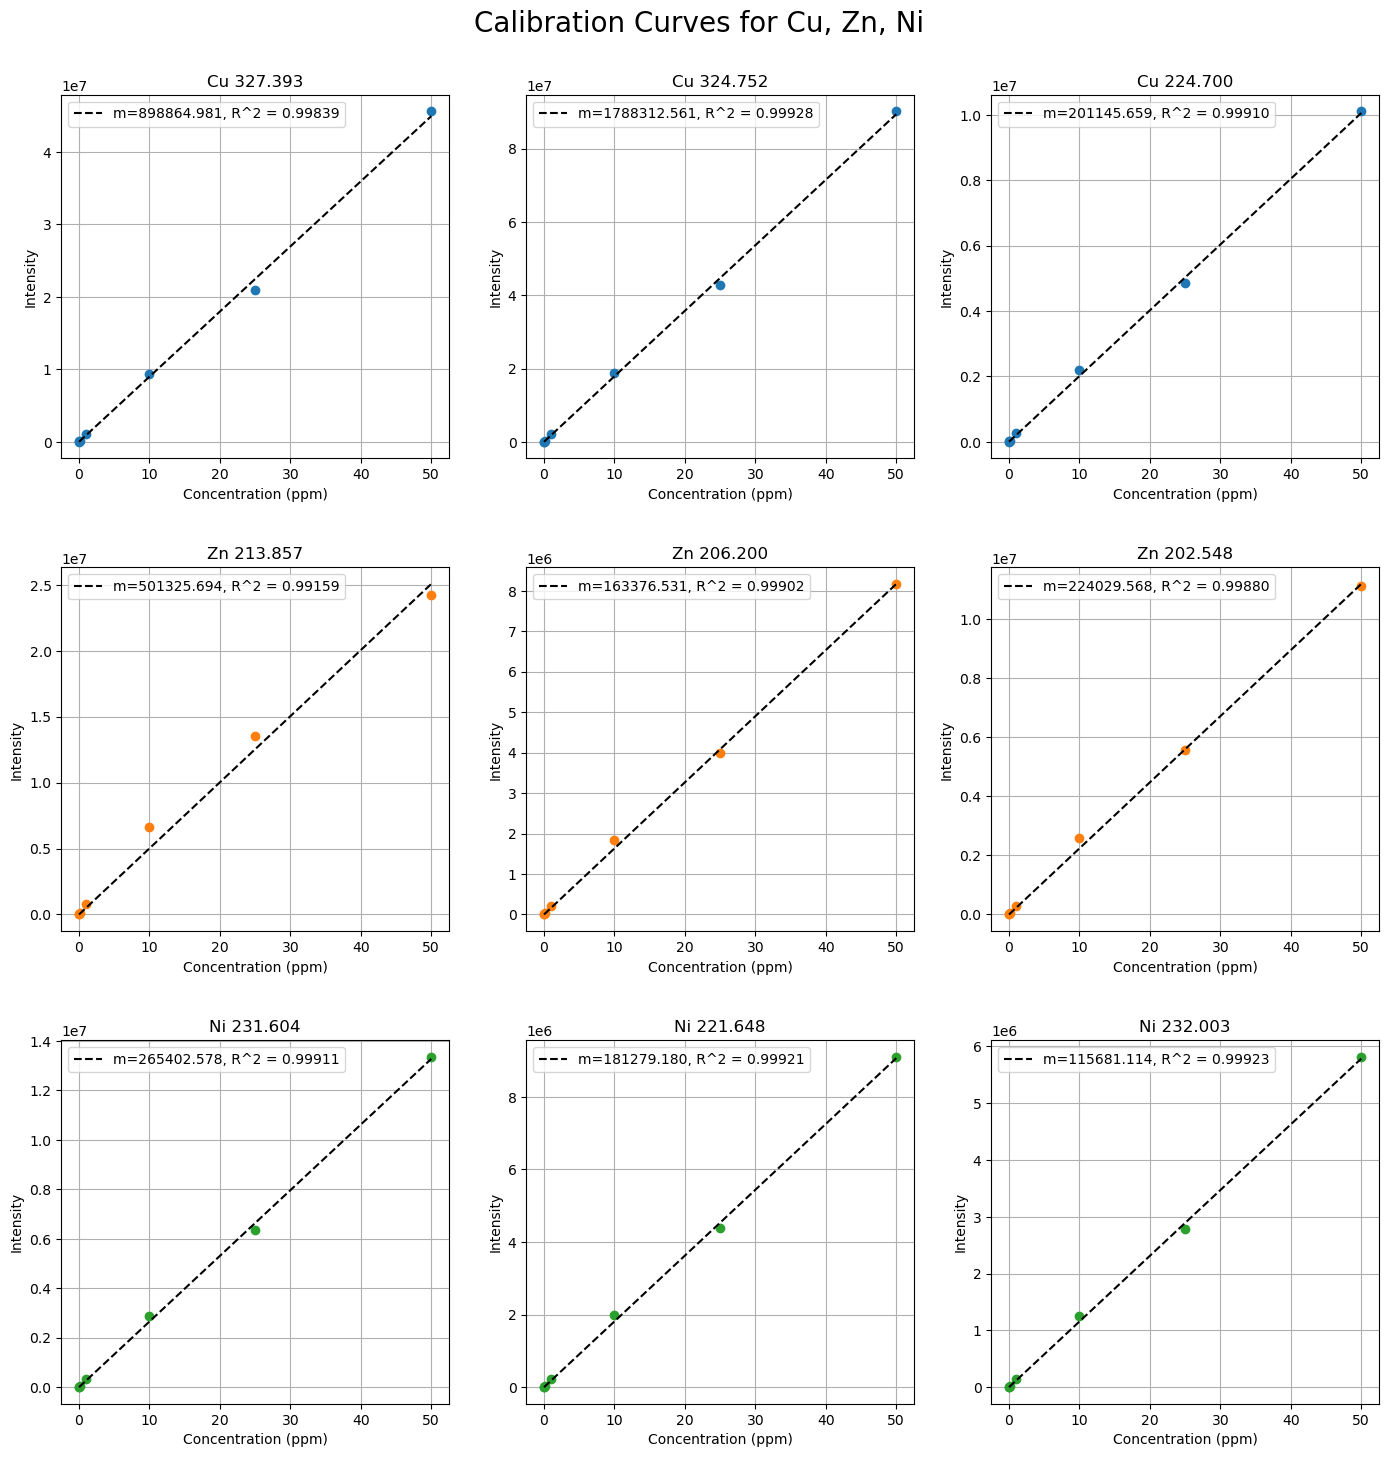

In [11]:
df_lists_broken = [[df_cu1, df_cu2, df_cu3], # broken df list in order of appearance
            [df_zn1, df_zn2, df_zn3], 
            [df_metal1, df_metal2, df_metal3]]

fig, axes = plt.subplots(3, 3, figsize=(17, 17))
plt.subplots_adjust(hspace=0.3, wspace=0.2)
plot_standrad_ax(axes, df_lists_broken)
fig.suptitle("Calibration Curves for Cu, Zn, Ni", fontsize=20, y=0.93)
plt.savefig('Visualizations/calibration_all.png', bbox_inches="tight")

# Slope, R^2, Limit of Detection

In [12]:
def m_r2_lod(dfs, ms, r2s, lods):
    """
    Calculate slope (ms), regression value (r2s), and
    limit of detection values (lods) for each wavelenth
    
    Parameters
    ----------
    dfs: list of pd.DataFrame object
        each dataframe must contain a blank + 6 standard 
        concentraions, specify the rows if necessary
    ms: list
        slope for each wavelengths
    r2s: list
        r^2 for each wavelengths
    lods: list
        limit of detection for each wavelengths
    """
    for df_iter in dfs:
        y = df_iter['Int (Corr)'].to_numpy()[0:7]
        yerr = df_iter['SD (Corr Int)'].to_numpy()[0:7]
        
        zero = y[0]
        y = y - zero

        x = np.array(c[:7])
        
        def model(x, m):
            return m * x

        slope, _ = curve_fit(model, x, y)
        slope = slope[0]

        y_pred = slope * x

        residuals = y - y_pred
        
        ss_res = np.sum(residuals**2)
        ss_tot = np.sum((y - np.mean(y))**2)

        r2 = 1 - (ss_res / ss_tot)

        n = len(x)
        sigma_y = np.sqrt(ss_res / (n - 1))

        lod = 3 * sigma_y / slope

        ms.append(slope)
        r2s.append(r2)
        lods.append(lod)

In [13]:
ms = []
r2s = []
lods = []

m_r2_lod(df_list, ms, r2s, lods)

print(f'cu2: {lods[1]}')
print(f'zn1: {lods[3]}')
print(f'ni1: {lods[6]}')

cu2: 1.5344995219250475
zn1: 5.119092298517716
ni1: 1.6977409321763088


# Sample concentration

In [14]:
def CI(conc, sd, n): # 95% confidence interval two tailed
    n = 3
    dof = n - 1

    se = sd / np.sqrt(n)
    t = stats.t.ppf(0.975, dof)
    ci = t * se
    print(f'concentration: {conc} ± {ci} ppm; sd: {sd} ppm')

In [15]:
df_brass = df[df['Sample ID'] == "brass"]
brass_int = df_brass['Int (Corr)'].tolist()
brass_sd = df_brass['SD (Corr Int)'].tolist()

cu2_conc = brass_int[1] / ms[1]
zn1_conc = brass_int[3] / ms[3]
metal1_conc = brass_int[6] / ms[6]

cu2_sd = brass_sd[1] / ms[1]
zn1_sd = brass_sd[3] / ms[3]
metal1_sd = brass_sd[6] / ms[6]

print(f'intensity: {brass_int[1]}')
print(f'intensity: {brass_int[3]}')
print(f'intensity: {brass_int[6]}')

print(f'sd: {brass_sd[1]}')
print(f'sd: {brass_sd[3]}')
print(f'sd: {brass_sd[6]}')

CI(cu2_conc, cu2_sd, 3)
CI(zn1_conc, zn1_sd, 3)
CI(metal1_conc, metal1_sd, 3)

intensity: 14758234.04
intensity: 336581.6093
intensity: -54.00698051
sd: 124245.5418
sd: 2529.694891
sd: 3.637614125
concentration: 8.252603244173095 ± 0.17258897727486022 ppm; sd: 0.06947641286577158 ppm
concentration: 0.6713831214626391 ± 0.01253498584497196 ppm; sd: 0.005046010849493169 ppm
concentration: -0.00020349079056233786 ± 3.404765123501461e-05 ppm; sd: 1.3706024055907303e-05 ppm


# Unknown Concentrations

In [16]:
df_unknown = df[df['Sample ID'] == "unknown standard"]
unknown_int = df_unknown['Int (Corr)'].tolist()
unknown_sd = df_unknown['SD (Corr Int)'].tolist()

cu2_conc = unknown_int[1] / ms[1]
zn1_conc = unknown_int[3] / ms[3]
ni1_conc = unknown_int[6] / ms[6]

cu2_sd = unknown_sd[1] / ms[1]
zn1_sd = unknown_sd[3] / ms[3]
ni1_sd = unknown_sd[6] / ms[6]

print(f'intensity: {unknown_int[1]}')
print(f'intensity: {unknown_int[3]}')
print(f'intensity: {unknown_int[6]}')

print(f'sd: {unknown_sd[1]}')
print(f'sd: {unknown_sd[3]}')
print(f'sd: {unknown_sd[6]}')

CI(cu2_conc, cu2_sd, 3)
CI(zn1_conc, zn1_sd, 3)
CI(ni1_conc, ni1_sd, 3)

intensity: 15586536.0
intensity: 23153613.65
intensity: 2436959.546
sd: 112606.9292
sd: 22620.23901
sd: 19010.02715
concentration: 8.715778406169031 ± 0.1564218278026825 ppm; sd: 0.06296825939428523 ppm
concentration: 46.184773546618636 ± 0.1120863930306418 ppm; sd: 0.045120845153570184 ppm
concentration: 9.182124605024988 ± 0.17793167502926358 ppm; sd: 0.07162713813724016 ppm
